In [1]:
import random
import numpy as np
import statsmodels.api as sm


from mlxtend.evaluate import bias_variance_decomp
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt

## Unbiased OLS

- https://datascience.stackexchange.com/questions/74442/why-scikit-and-statsmodel-provide-different-coefficient-of-determination
- https://www.youtube.com/watch?v=BsCgwERndJ0&ab_channel=BenLambert

### Generate Data
$$ y = \beta_0 + \beta_1 * x $$

$$ \hat{y} = b_0 + b_1 * x $$
- $b_0$ is the estimator of $\beta_0$
- $b_1$ is the estimator of $\beta_1$

In [2]:
beta0 = 1
beta1 = 1

In [3]:
n = 10000 # sample size
m = 1000 # Number of samples 
b1 = np.zeros([m,1]) # Store the estimated beta in a vector

In [4]:
np.random.seed(1)
for i in range(m):
    X = sm.add_constant(np.arange(n)) # add a column of 1
    y = np.dot(X, [beta0, beta1]) + np.random.normal(size=n) # generate data y = beta0 + beta1*x + noise
    result = sm.OLS(y, X).fit()
    b1[i] = result.params[0] # here we only focus on b1

Text(1.0052110606136615, 93.555, 'Mean of b1: 1.0002')

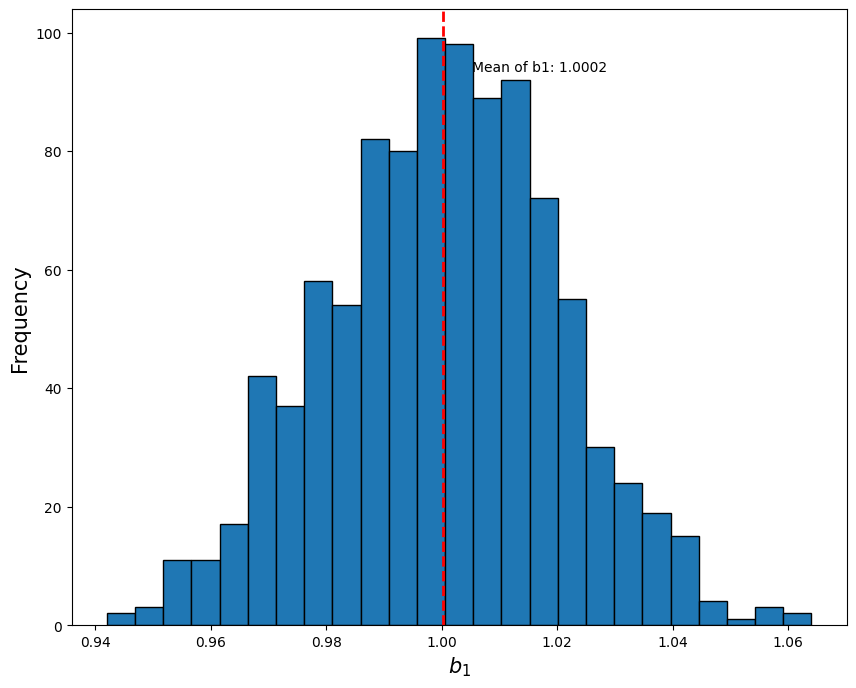

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

plt.hist(b1, bins=25,  edgecolor = "black")
plt.xlabel('$b_1$', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
# add mean of b1
plt.axvline(b1.mean(), color='r', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(b1.mean()*1.005, max_ylim*0.9, 'Mean of b1: {:.4f}'.format(b1.mean()))

## Bias and Variance Decomposition

### load data
- http://rasbt.github.io/mlxtend/user_guide/data/boston_housing_data/#boston_housing_data-the-boston-housing-dataset-for-regression

In [6]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

### Linear Regression

In [7]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_lr.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = reg_lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = round(reg_lr.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.492698146979513
R2 score is 0.76


The model performance for training set
--------------------------------------
RMSE is 5.329714327288869
R2 score is 0.65




### bias and variance decomposition on testing dataset
- http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

In [8]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg_lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 29.891
Average bias: 28.609
Average variance: 1.282
